# **Packages**

In [2]:
import numpy as np # NumPy
import pandas as pd # Pandas (data processing)
import seaborn as sns # Seaborn dataviz
import matplotlib.pyplot as plt # Matplotlib (data visualization)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salary-2021-to-2023/Data Science Salary 2021 to 2023.csv


# **Import data**

In [4]:
df = pd.read_csv('/kaggle/input/data-science-salary-2021-to-2023/Data Science Salary 2021 to 2023.csv')
df.drop_duplicates(inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


    EN - "Entry" employees who are at the beginning of their careers

    MI - "Mid" or "Middle": employees who have gained some experience in their field but aren't yet considered experts or senior-level professionals. 

    SE - "Senior": employees have substantial experience and expertise in their field.

    EX - "Expert" or "Executive": expert-level professionals or "executive" such as CEOs, CFOs, etc.

# **Data description**

## Numeric data description

In [5]:
df.describe(include='int').T

,count,mean,std,min,25%,50%,75%,max
work_year,2410.0,2022.288382,0.761946,2020.0,2022.0,2022.0,2023.0,2023.0
salary,2410.0,215383.321992,836390.559972,6000.0,87245.0,134000.0,183600.0,30400000.0
salary_in_usd,2410.0,132828.553942,68354.800993,5132.0,82528.0,128625.0,175000.0,450000.0


## Categorical data description

In [6]:
df.describe(include='object').T

,count,unique,top,freq
experience_level,2410,4,SE,1417
employment_type,2410,4,FT,2373
job_title,2410,93,Data Engineer,529
salary_currency,2410,20,USD,1939
company_location,2410,72,US,1762
company_size,2410,3,M,1857


## Review of null cells

In [7]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

# **EDA**

## Job titles

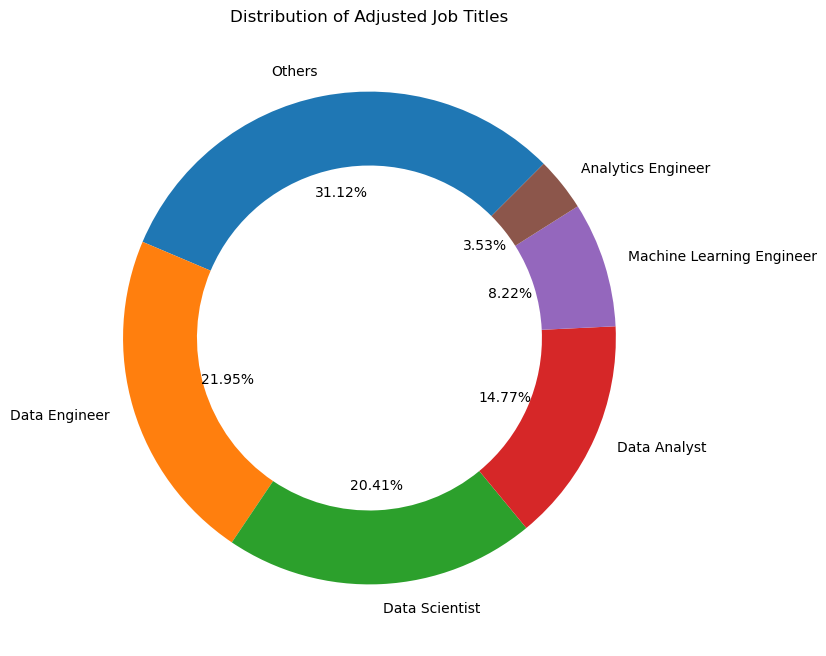

In [8]:
# Calculate frequency of each job title
job_title_counts = df['job_title'].value_counts()

# Determine titles below the threshold, e.g., less than 100 occurrences
low_frequency_titles = job_title_counts[job_title_counts < 75].index

# Replace these titles in the dataframe with "Others"
df['adjusted_job_title'] = df['job_title'].apply(lambda x: "Others" if x in low_frequency_titles else x)

# Recalculate the frequency
adjusted_counts = df['adjusted_job_title'].value_counts()

# Plot
plt.figure(figsize=(10,8))
adjusted_counts.plot.pie(autopct='%.2f%%', startangle=45, wedgeprops=dict(width=0.3))
plt.title('Distribution of Adjusted Job Titles')
plt.ylabel('')  # Hide the 'adjusted_job_title' y-label
plt.show()

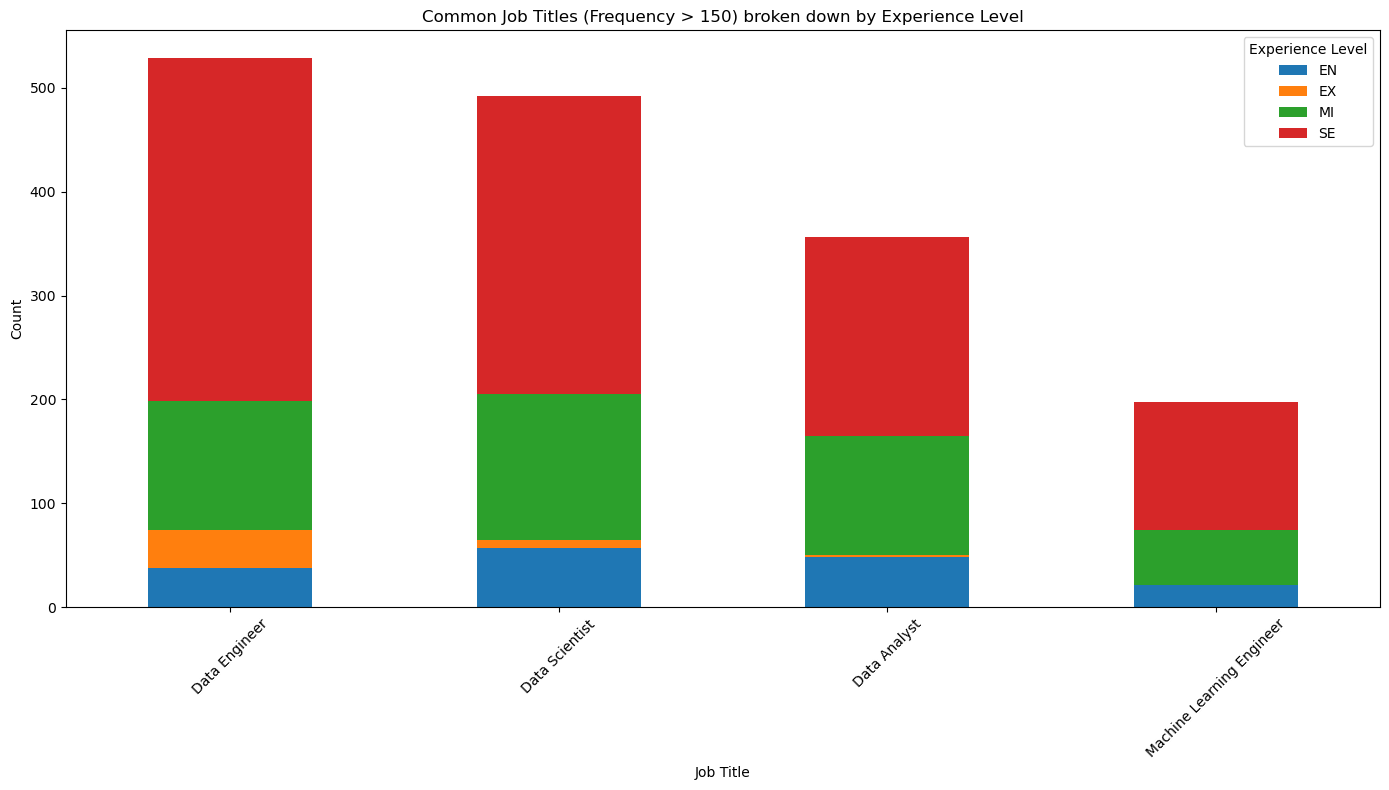

In [9]:
# Calculate frequency of each job_title
job_title_counts = df['job_title'].value_counts()

# Identify job titles with frequency > N
N = 150
common_titles = job_title_counts[job_title_counts > 100].index.tolist()

# Filter the DataFrame based on these job titles
filtered_df = df[df['job_title'].isin(common_titles)]

# Group by 'job_title' and 'experience_level' and then unstack
grouped = filtered_df.groupby(['job_title', 'experience_level']).size().unstack().fillna(0)

# Order the grouped dataframe by the total counts of each job_title
ordered_grouped = grouped.reindex(job_title_counts.index).dropna()

# Plotting the ordered grouped stacked bar chart
ax = ordered_grouped.plot(kind='bar', stacked=True, figsize=(14, 8))

# Adding labels and title
plt.title(f'Common Job Titles (Frequency > {N}) broken down by Experience Level')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.legend(title='Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* We see that the three most job titles are: i) Data engineer, ii) Data scientist and iii) Data analyst
* The *Senior* experience level is the most required one, followed far by *Middle* experience level.

## Salary comparison

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


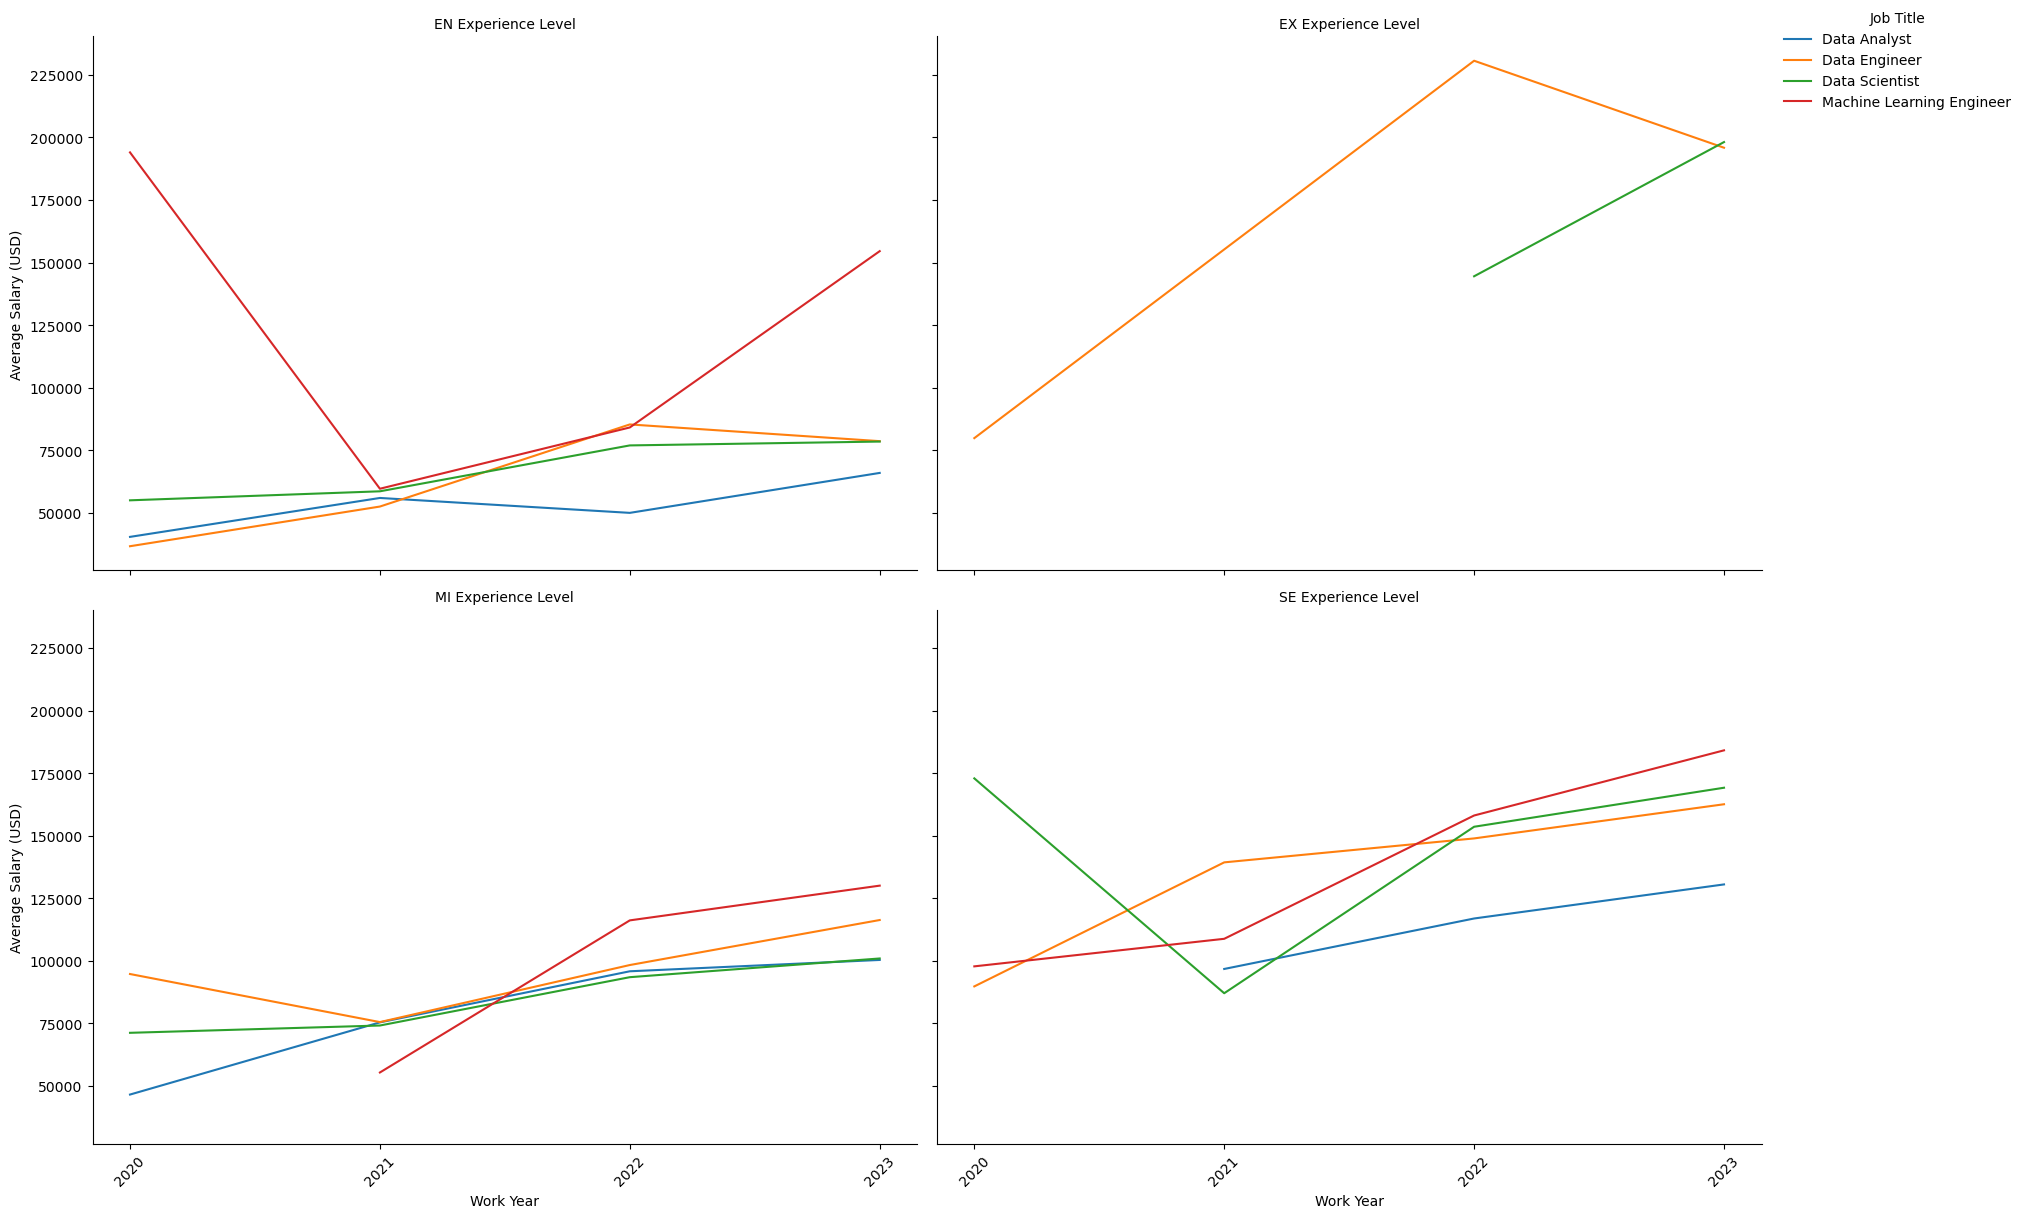

In [10]:
common_titles = ['Data Engineer', 'Data Scientist','Data Analyst','Machine Learning Engineer']
# Filter the DataFrame based on these job titles
filtered_df = df[df['job_title'].isin(common_titles)]

# Group by relevant columns and calculate mean salary
grouped = filtered_df.groupby(['job_title', 'experience_level', 'work_year'])['salary_in_usd'].mean().reset_index()

# Create a FacetGrid with separate plots for each experience_level
g = sns.FacetGrid(grouped, col='experience_level', col_wrap=2, height=6, aspect=1.5)
g = (g.map(sns.lineplot, 'work_year', 'salary_in_usd', 'job_title', estimator='mean', errorbar=None, palette='tab10')
     .set_axis_labels('Work Year', 'Average Salary (USD)')
     .set_titles("{col_name} Experience Level"))

# Adjust xticks and rotate labels for better readability
g.set(xticks=grouped['work_year'].unique())  # Show all unique work_years as xticks
g.set_xticklabels(grouped['work_year'].unique(), rotation=45)

# Adjust the legend position
g.add_legend(title='Job Title', loc='upper right')

# Display the plots
plt.show()

* We clearly see that salaries have been increasing over time for all the four most requested jobs faceted by experience level

## Distribution of salaries

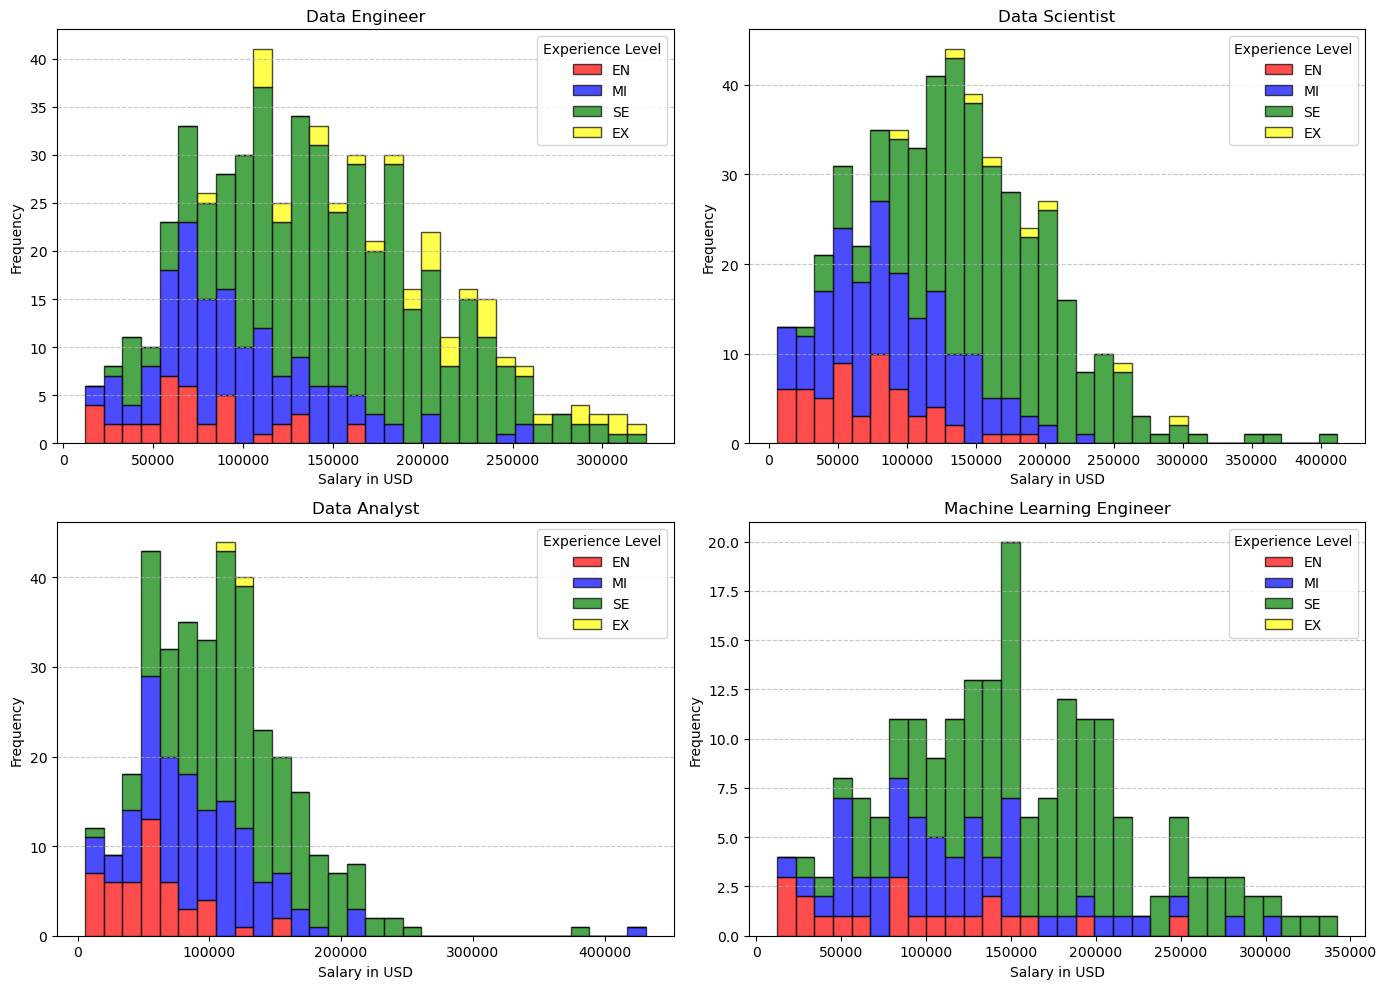

In [16]:
common_titles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer']
experience_levels = ['EN', 'MI', 'SE', 'EX']
colors = ['red', 'blue', 'green', 'yellow']

# Assuming you have a dataframe named df with columns 'job_title', 'salary_in_usd', and 'experience_level'
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easier indexing
axes = axes.ravel()

# Plot histograms for each job title
for i, title in enumerate(common_titles):
    ax = axes[i]
    
    # Loop through each experience level to stack histograms
    data = []  # List to store data for each experience level for stacked histogram
    labels = []  # List to store labels for legend
    for j, exp in enumerate(experience_levels):
        subset = df[(df['job_title'] == title) & (df['experience_level'] == exp)]
        data.append(subset['salary_in_usd'])
        labels.append(exp)

    # Plot stacked histogram
    ax.hist(data, bins=30, color=colors[:len(data)], edgecolor='black', alpha=0.7, stacked=True, label=labels)
    ax.set_title(title)
    ax.set_xlabel('Salary in USD')
    ax.set_ylabel('Frequency')
    ax.legend(title='Experience Level')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

* As expected, the senior level employees earn more than entry and mid level ones.
* The EX experience level is distributed evenly across salaries and we can conclude that this experience level of jobs does not imply an increase in earnings.

## Distribution of total salaries

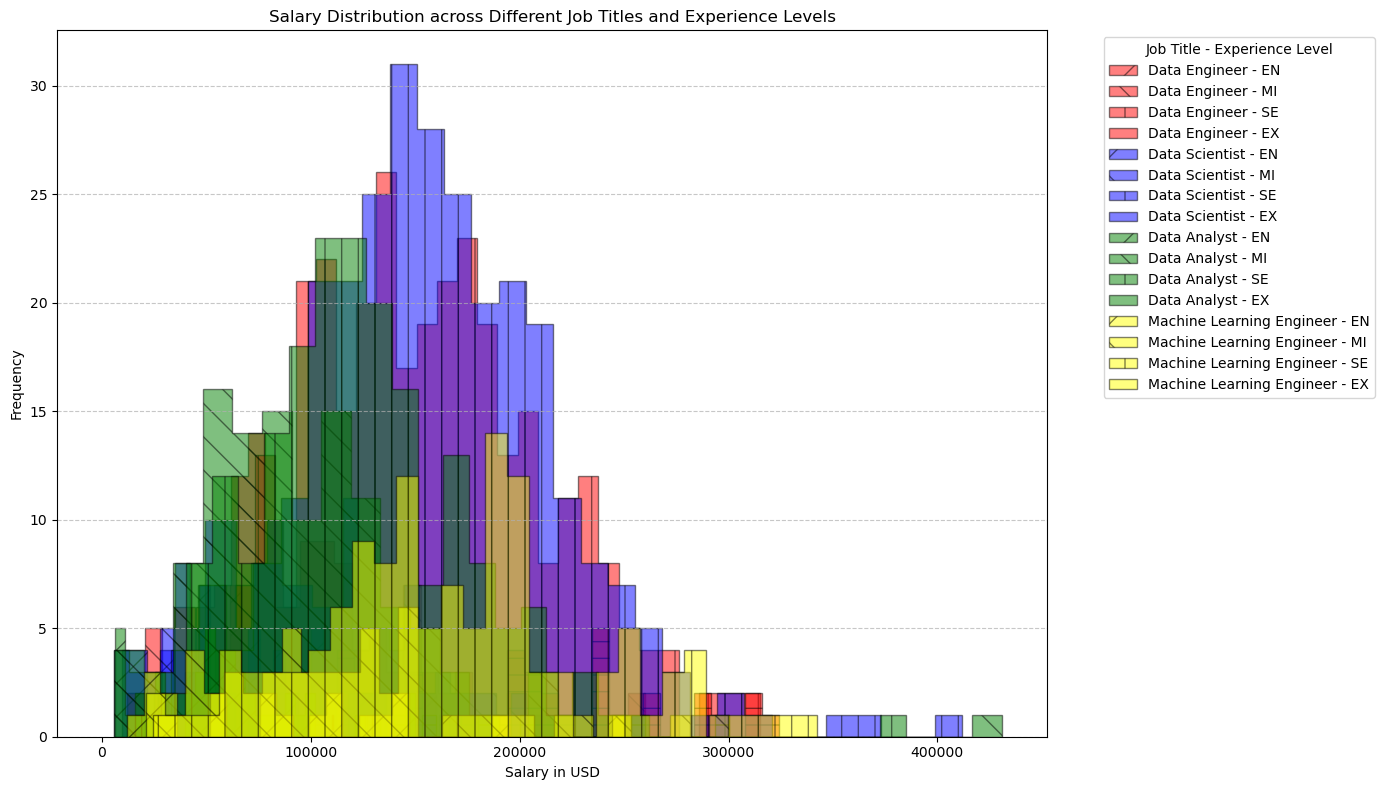

In [17]:
# Filter the dataframe for only the selected job titles
subset_df = df[df['job_title'].isin(common_titles)]

# Define colors and patterns for the different experience levels
experience_levels = ['EN', 'MI', 'SE', 'EX']
colors = ['red', 'blue', 'green', 'yellow']
patterns = ['/', '\\', '|', '-']

plt.figure(figsize=(14, 8))

# Plot histograms for each job title and experience level
for title, color in zip(common_titles, colors):
    for j, exp in enumerate(experience_levels):
        data = subset_df[(subset_df['job_title'] == title) & (subset_df['experience_level'] == exp)]['salary_in_usd']
        
        plt.hist(data, bins=30, color=color, edgecolor='black', alpha=0.5, 
                 hatch=patterns[j], label=f'{title} - {exp}', histtype='stepfilled')

plt.title('Salary Distribution across Different Job Titles and Experience Levels')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.legend(title='Job Title - Experience Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Profile report

In [11]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_notebook_iframe() # use this line to show the output

# Correlations

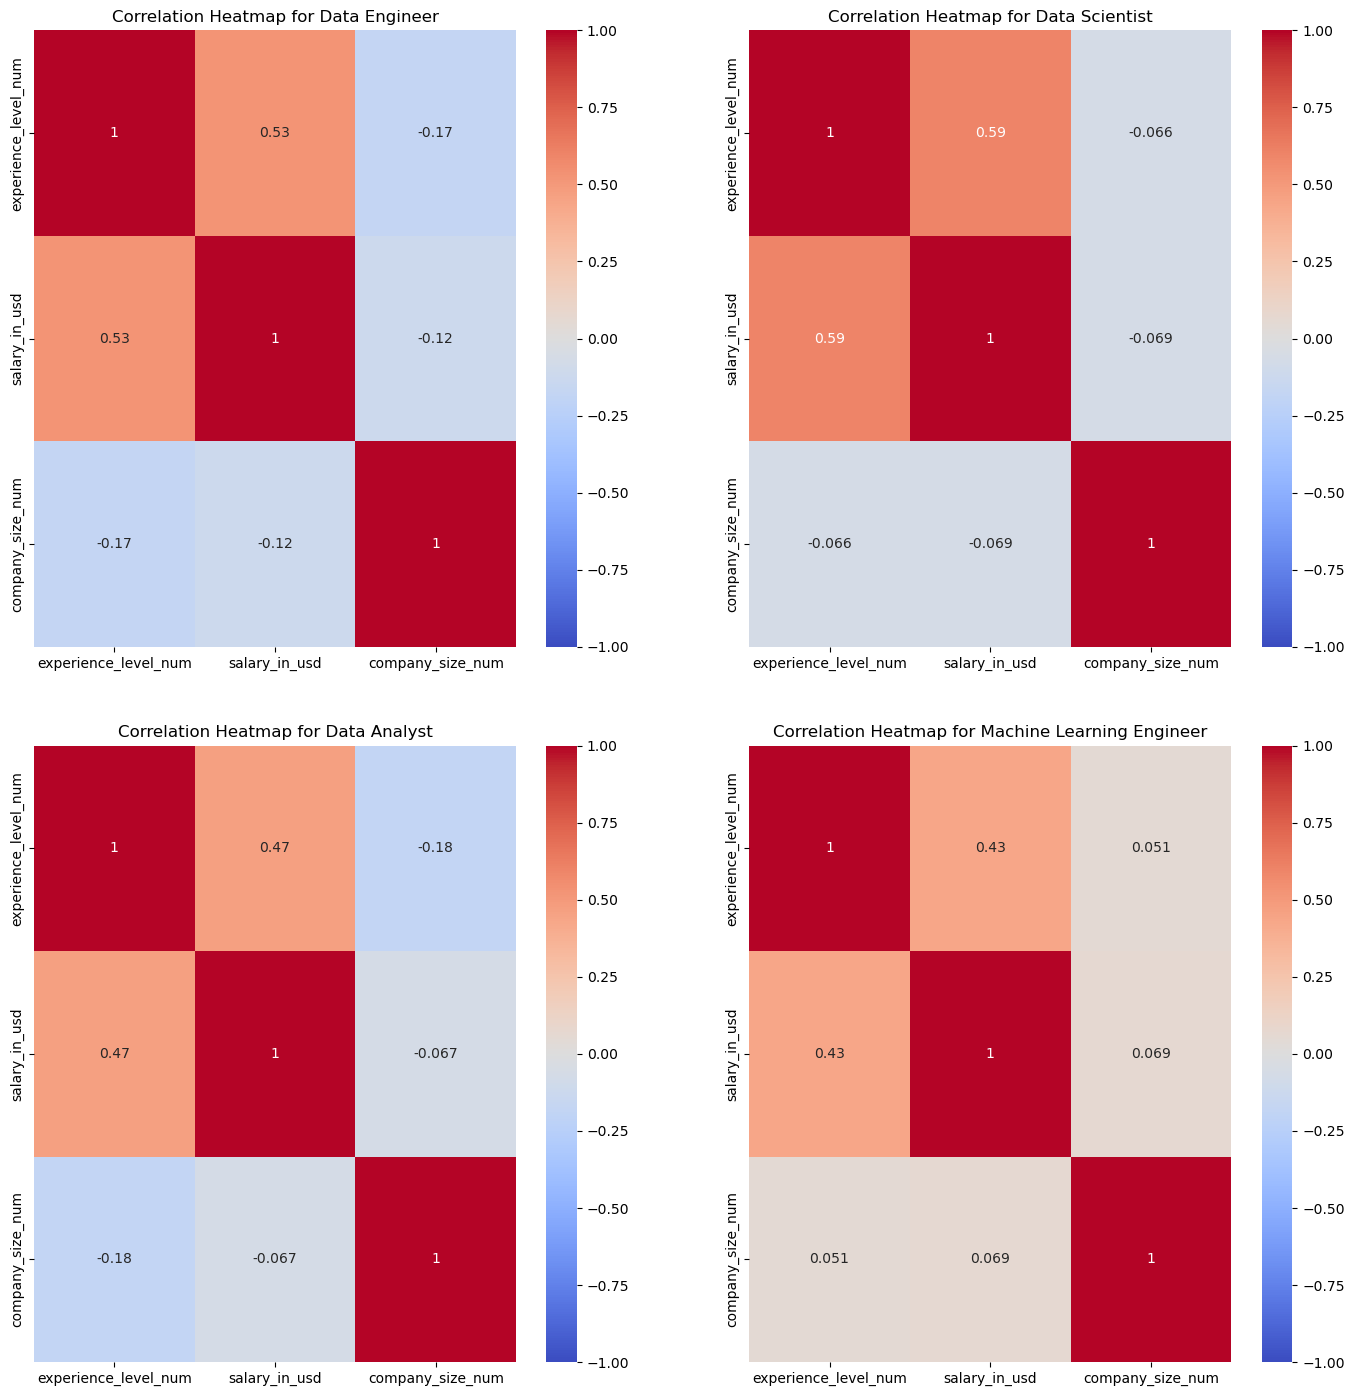

In [12]:
common_titles = ['Data Engineer', 'Data Scientist','Data Analyst','Machine Learning Engineer']

# Map categorical variables to numerical representations
experience_level_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
company_size_mapping = {'S': 0, 'M': 1, 'L': 2}

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout(pad=5.0)  # Add padding between subplots for clarity

for ax, title in zip(axes.ravel(), common_titles):
    # Filter dataframe for the specific job title
    filtered_df = df[df['job_title'] == title].copy()
    
    # Convert the categorical variables to numerical representations using .loc
    filtered_df.loc[:, 'experience_level_num'] = filtered_df['experience_level'].map(experience_level_mapping)
    filtered_df.loc[:, 'company_size_num'] = filtered_df['company_size'].map(company_size_mapping)
    
    # Compute the correlation matrix for the specific columns
    correlation_matrix = filtered_df[['experience_level_num', 'salary_in_usd', 'company_size_num']].corr(method='spearman')

    # Plot the heatmap in the corresponding subplot
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
    ax.set_title(f"Correlation Heatmap for {title}")

plt.show()

# SE experience level analysis

## Distribution of salaries for SE experience level

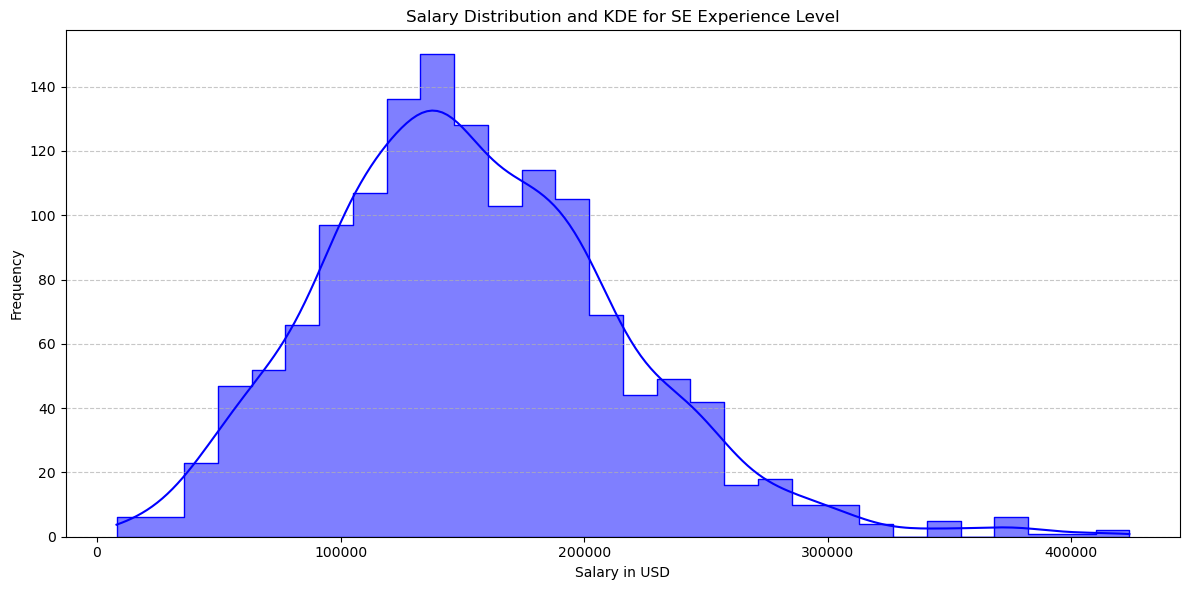

In [20]:
# Filter the dataframe for the experience level 'SE'
subset_df = df[df['experience_level'] == 'SE']

plt.figure(figsize=(12, 6))

# Plot histograms and KDE for experience level 'SE'
sns.histplot(subset_df['salary_in_usd'], bins=30, color='blue', kde=True, element="step")

plt.title('Salary Distribution and KDE for SE Experience Level')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

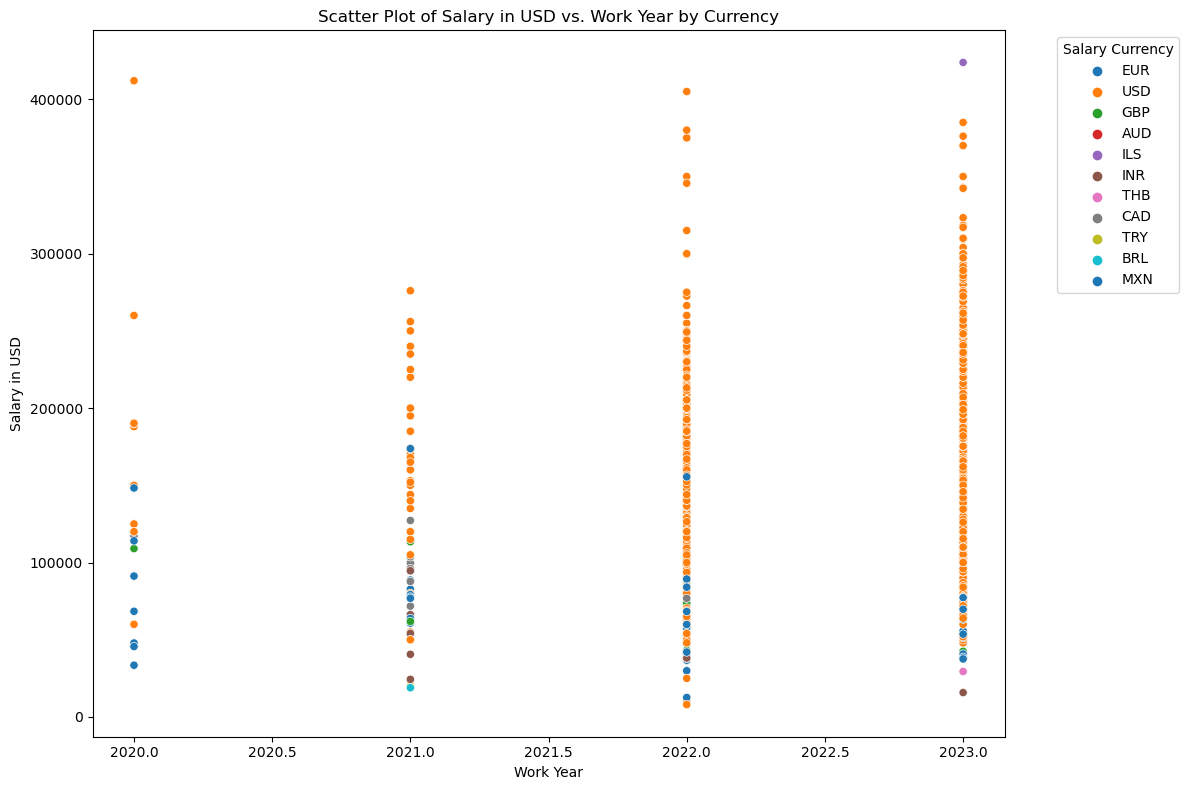

In [22]:
# Filter the dataframe for the experience level 'SE'
subset_df = df[df['experience_level'] == 'SE']

plt.figure(figsize=(12, 8))

# Scatter plot with 'salary_currency' as hue
sns.scatterplot(data=subset_df, x='work_year', y='salary_in_usd', hue='salary_currency', palette='tab10')

plt.title('Scatter Plot of Salary in USD vs. Work Year by Currency')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.legend(title='Salary Currency', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Salary differentiation by location

In [35]:
# Filter the dataframe for the experience level 'SE'
# df_se = df[df['experience_level'].isin(['SE','MI'])]
df_se = df.copy()

# Calculate mean salaries for each Location:
mean_salaries = df_se.groupby(['salary_currency'])['salary_in_usd'].mean().reset_index()

currency_to_coords = {
    'USD': (37.0902, -95.7129),
    'INR': (20.5937, 78.9629),
    'CAD': (56.1304, -106.3468),
    'EUR': (50.8503, 4.3517),  # Taking Brussels as a representative for Euro
    'CHF': (46.8182, 8.2275),
    'PLN': (51.9194, 19.1451),
    'BRL': (-14.2350, -51.9253),
    'GBP': (51.509865, -0.118092),
    'HKD': (22.3193, 114.1694),
    'SGD': (1.3521, 103.8198),
    'THB': (13.7563, 100.5018),
    'AUD': (-25.2744, 133.7751),
    'ILS': (31.046051, 34.851612),
    'HUF': (47.1625, 19.5033),
    'CZK': (49.8175, 15.4730),
    'DKK': (55.6761, 12.5683),
    'JPY': (35.6895, 139.6917),
    'TRY': (38.9637, 35.2433),
    'CLP': (-35.6751, -71.5430),
    'MXN': (19.4326, -99.1332)
}

# Create columns of Latitude and Longitude for Geographic locations of currencies
mean_salaries['latitude'] = mean_salaries['salary_currency'].map(lambda x: currency_to_coords[x][0])
mean_salaries['longitude'] = mean_salaries['salary_currency'].map(lambda x: currency_to_coords[x][1])

### Interactive map

In [36]:
import folium
import branca

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)  # starting view point

# Define colormap
colormap = branca.colormap.linear.YlOrRd_09.scale(
    mean_salaries['salary_in_usd'].min(),
    mean_salaries['salary_in_usd'].max()
)

# Add salary data
for index, row in mean_salaries.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=10,
        color=colormap(row['salary_in_usd']),
        fill=True,
        fillColor=colormap(row['salary_in_usd']),
        fill_opacity=0.6,
        popup=f"Mean Salary: ${row['salary_in_usd']:.2f}"
    ).add_to(m)

# Add the color bar at the top of the map
colormap.add_to(m)

# Display the map
m